In [1]:
%matplotlib inline
import sys
sys.path.append("../src/")
from sgpi.util import scale, transform_cox
from sgpi.plot import plot_cox_df
import pandas as pd

	Name		Data Type	Meas.	Description
	----		---------	-----	-----------
        Sex		nominal			M, F, and I (infant)
	Length		continuous	mm	Longest shell measurement
	Diameter	continuous	mm	perpendicular to length
	Height		continuous	mm	with meat in shell
	Whole weight	continuous	grams	whole abalone
	Shucked weight	continuous	grams	weight of meat
	Viscera weight	continuous	grams	gut weight (after bleeding)
	Shell weight	continuous	grams	after being dried
	Rings		integer			+1.5 gives the age in years

In [46]:
names = ['sex', 'length' , 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
df = pd.read_csv('../datasets/raw/abalone/abalone.data.txt', names=names)

In [47]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [48]:
df = pd.get_dummies(df)
cols = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'sex_F', 'sex_I', 'sex_M', 'rings']
df[cols]
df = df[cols]
_, df = scale(df)

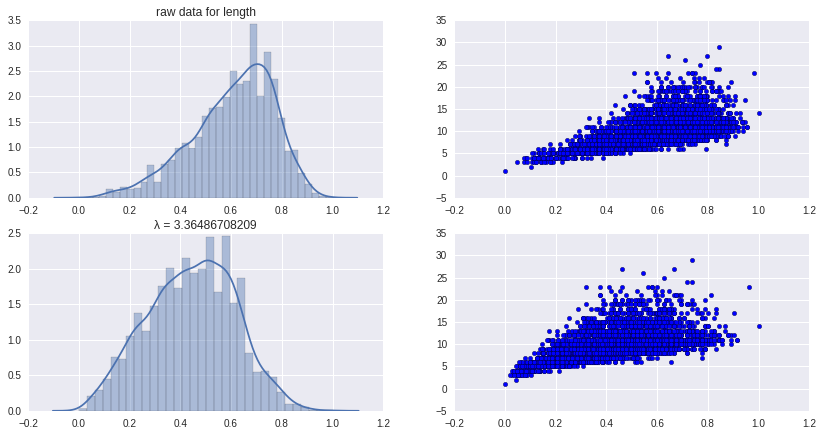

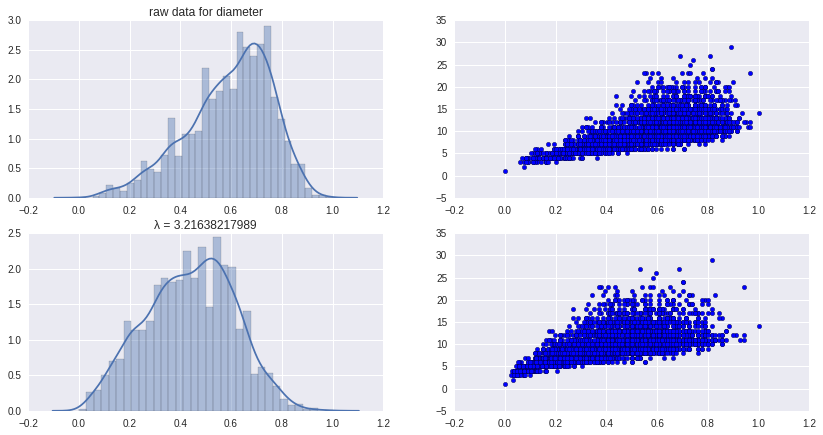

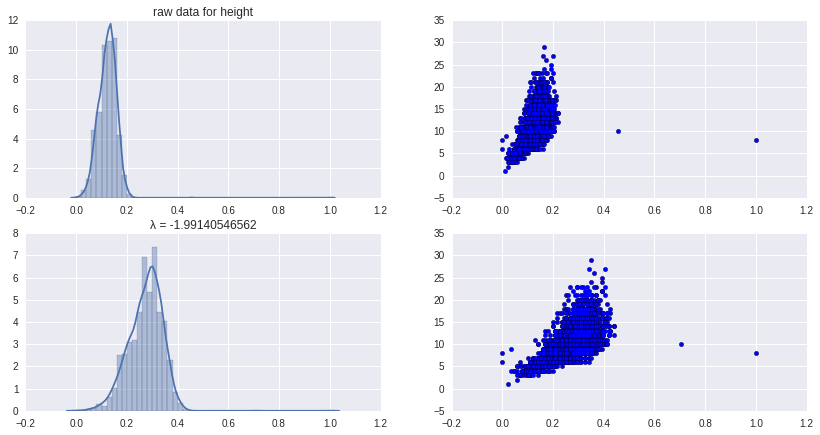

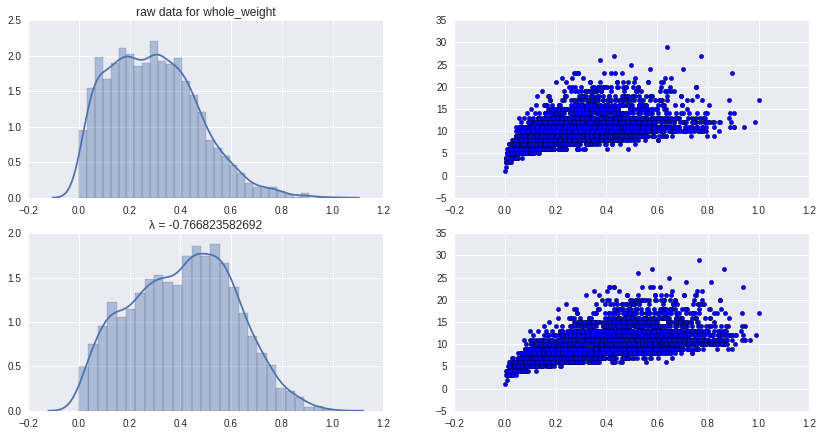

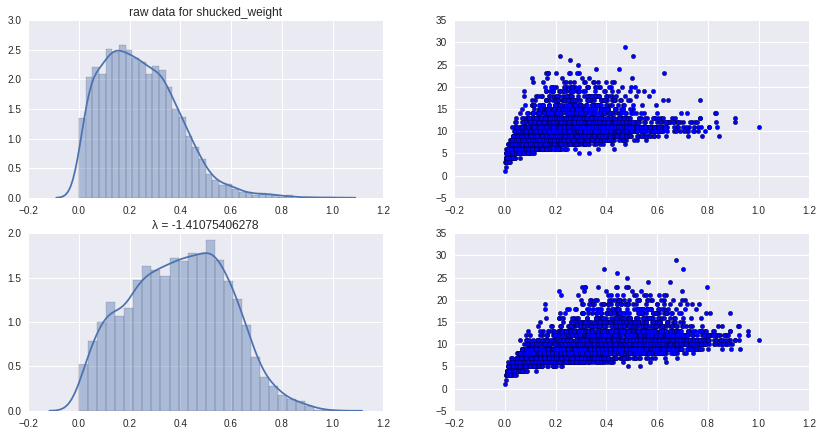

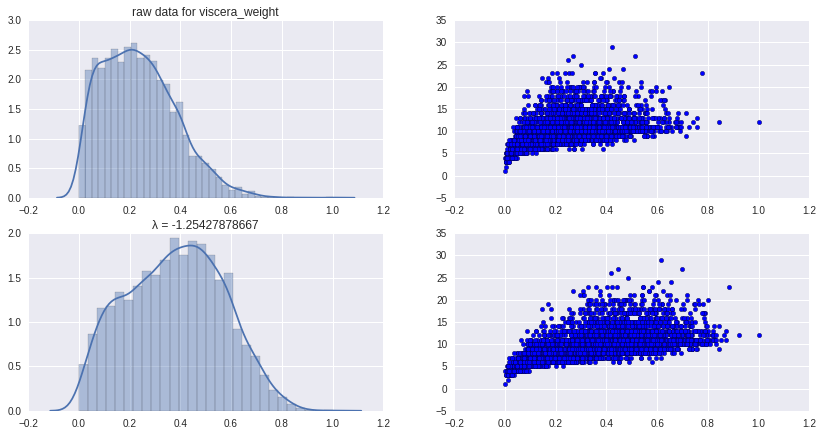

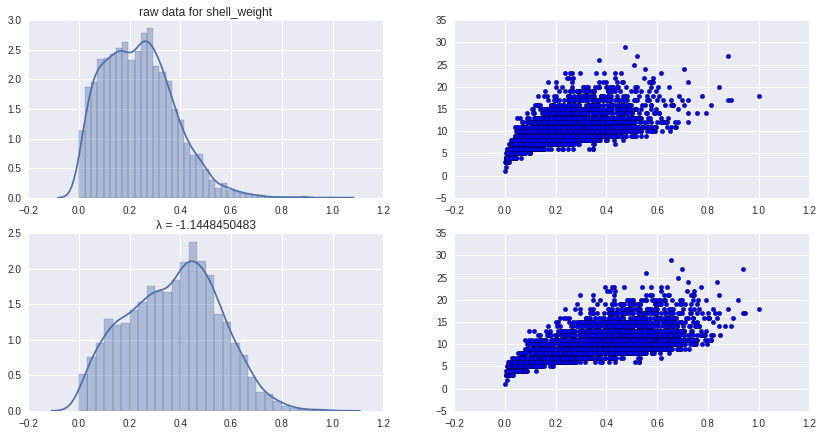

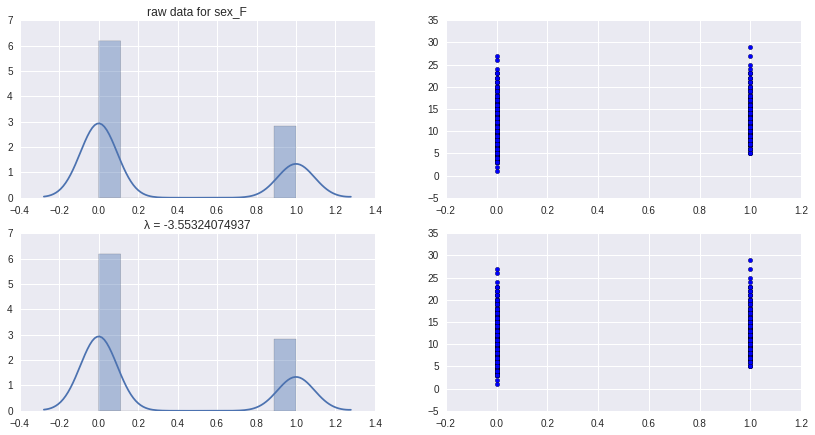

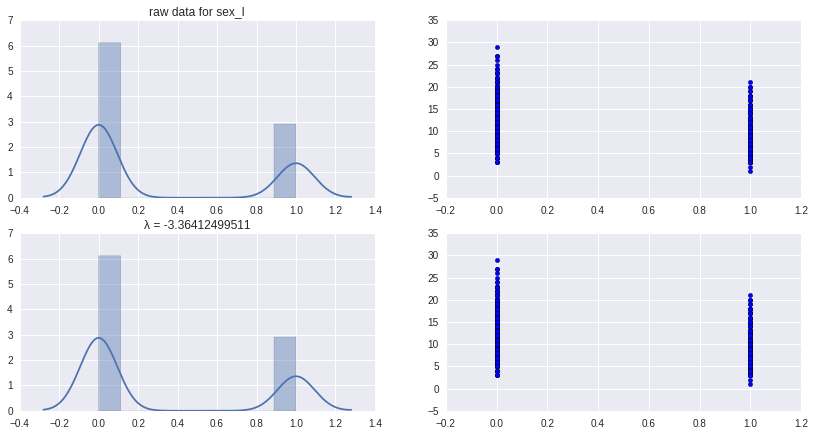

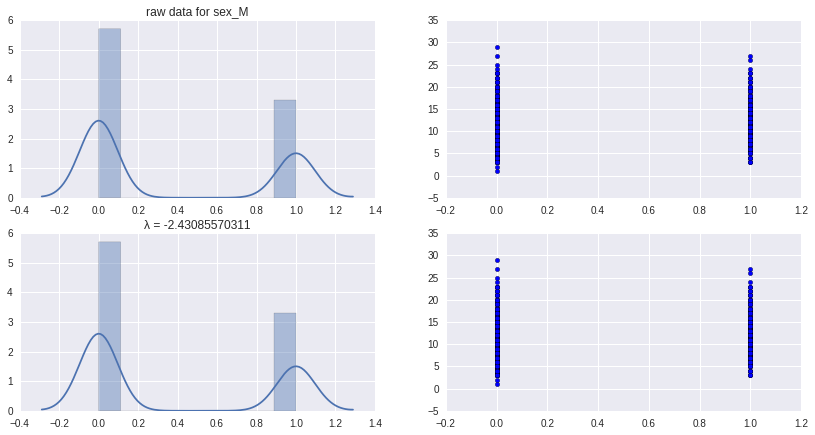

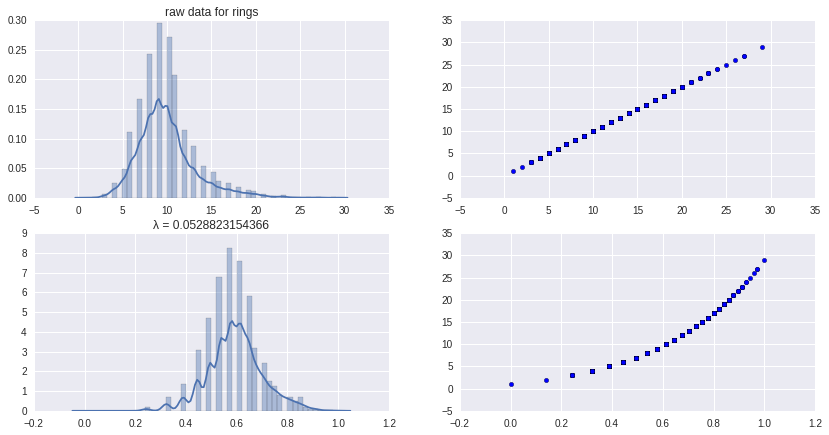

In [49]:
lambdas = plot_cox_df(df)

In [50]:
lambdas = { 'diameter': 3.2163821798943193,
            'height': -1.9914054656190996,
            'length': 3.3648670820916347,
            'sex_F': 1,
            'sex_I': 1,
            'sex_M': 1,
            'shell_weight': -1.1448450483002799,
            'shucked_weight': -1.4107540627818103,
            'viscera_weight': -1.2542787866665741,
            'whole_weight': -0.76682358269227757}

In [51]:
df = transform_cox(df, lambdas)

In [52]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.443564,0.439081,0.273235,0.409840,0.393153,0.378816,0.372501,0.312904,0.321283,0.365813,9.933684
std,0.171399,0.173175,0.066539,0.201984,0.194191,0.188509,0.179829,0.463731,0.467025,0.481715,3.224169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.319579,0.319655,0.234494,0.254685,0.244382,0.232230,0.235236,0.000000,0.000000,0.000000,8.000000
50%,0.454837,0.450499,0.277253,0.421241,0.399448,0.386237,0.387480,0.000000,0.000000,0.000000,9.000000
75%,0.571989,0.561949,0.317565,0.559407,0.538737,0.520542,0.504374,1.000000,1.000000,1.000000,11.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.000000
